In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import wkbl
import warnings
import os
import sys
import wkbl.astro.nbody_essentials as nbe
warnings.filterwarnings("ignore")
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
path = "/data/MESO/Arturo/NewSchool/Turbach/Lowres/box25Mpc_4zoom_turbach_halo5_hydro/output_00041"
myhalo = wkbl.Galaxy_Hound(path,"halo,stars,gas")

loading Dark matter..
loading Stars..
loading Gas..


In [3]:
cen = myhalo.dm.Clumps.pos3d[myhalo.dm.Clumps.cell==myhalo.dm.Clumps.cell.max()]
myhalo.center_shift(cen)

In [6]:
m_gas = myhalo.gs.mass.sum()
m_dm = myhalo.dm.mass.sum()
m_stars = myhalo.st.mass.sum()
print "this should be the baryon factor (~0.15) is it  -> {0}".format(m_gas / (m_gas+m_dm))

this should be the baryon factor (~0.15) is it  -> 0.15725697577


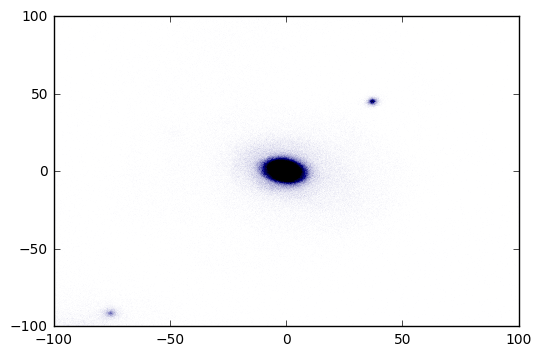

In [7]:
fig, ax = plt.subplots()
ax.set_xlim([-100,100])
ax.set_ylim([-100,100])

ax.scatter(myhalo.st.pos3d[:,0],myhalo.st.pos3d[:,2], s=0.01, lw=0,alpha=0.2)

In [8]:
myhalo.r_virial(600)

| r_200 = 483.3984375
---- taking particles inside 2.5 * r200
min -1203.29640481, max 1195.78172019
| number of praticles inside 2.5 * r200 
| dm mass       =  5.08554578493e+13 M_sun
| p_dm_200      =  932721 particles
| stellar mass  =  59270946816.0 M_sun
| p_st_200      =  2336055 psrticles
| gas mass      =  8.65064189952e+12 M_sun
| p_gs_200      =  8117000 particles
---- rotating galaxy 
| Diagonal matrix computed 
|    |13,0,0|
| D =|0,12,0|
|    |0,0,2|


In [9]:
myhalo.redefine(2.5)

min -1207.08500475, max 1196.47812784


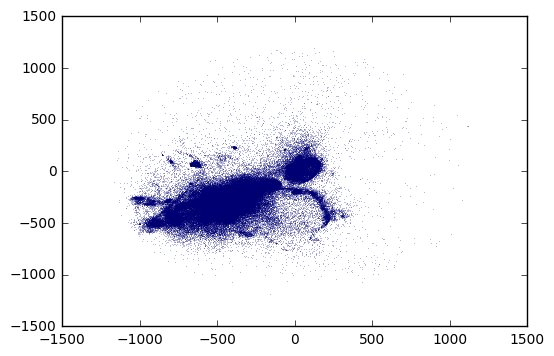

In [10]:
fig , ax = plt.subplots()
ax.scatter(myhalo.st.pos3d[:,0],myhalo.st.pos3d[:,2], s=0.1,lw=0)


In [11]:
myhalo.st.pos3d[:,0]

array([ -742.99437209,  -744.19475363,  -750.17028073, ...,  1001.97804713,
        1117.0270508 ,  1114.08212276])

In [10]:
lim = 20
m_gas = np.sum(myhalo.gs.mass[myhalo.gs.r<lim])
m_stars = np.sum(myhalo.st.mass[myhalo.st.r<lim])
print m_gas / (m_gas+m_stars)

0.703781


In [11]:
lim = 20
m_gas = np.sum(myhalo.gs.mass[(myhalo.gs.R<lim)&(np.abs(myhalo.gs.pos3d[:,2])<2.)])
m_stars = np.sum(myhalo.st.mass[(myhalo.st.R<lim)&(np.abs(myhalo.st.pos3d[:,2])<2.)])
print m_gas / (m_gas+m_stars)

0.723792


In [12]:
myhalo.st.vel3d = nbe.matrix_vs_vector(myhalo.matrix_T,myhalo.st.vel3d)

In [13]:
ring = (abs(myhalo.st.pos3d[:,2]<2.))&(myhalo.st.R>7)&(myhalo.st.R<9)

pos = myhalo.st.pos3d[ring]
vel = myhalo.st.vel3d[ring]
dmindex = np.random.randint(0,high=len(myhalo.st.pos3d[ring,0]),size=1000)

xdm = pos[dmindex,0]
ydm = pos[dmindex,1]
vxdm = vel[dmindex,0]/120.
vydm = vel[dmindex,1]/120.




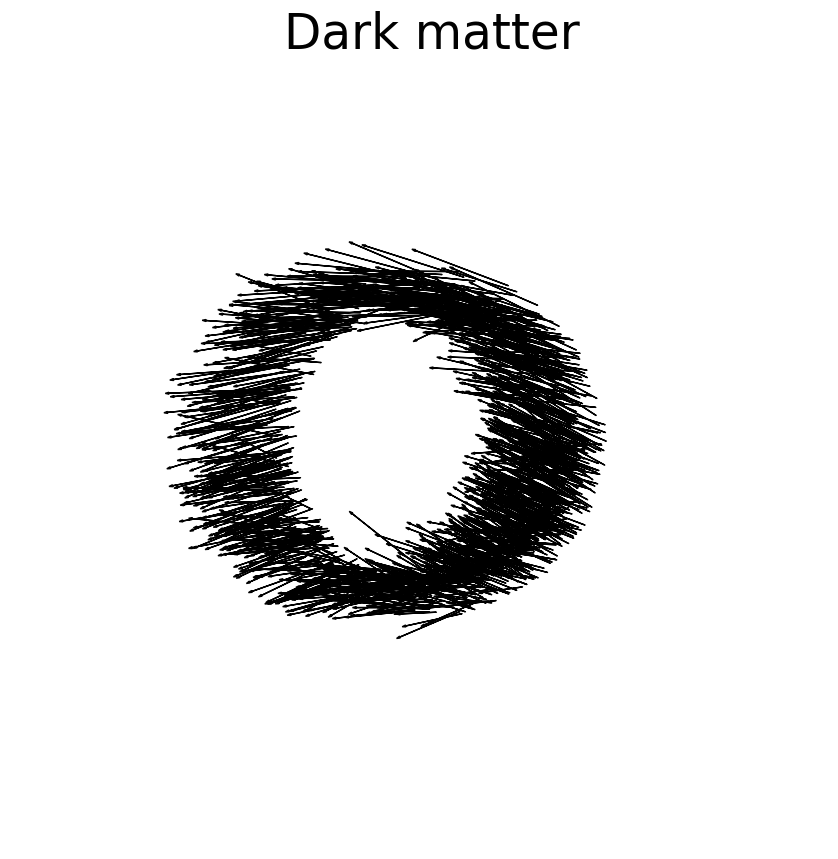

In [14]:
fig,ax = plt.subplots(figsize=[10,10])
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])
plt.axis('off')
ax.set_title("Dark matter",fontsize=35)

for i in range(0,len(xdm)):
    ax.arrow(xdm[i], ydm[i], vxdm[i], vydm[i], head_width=0.1, head_length=.19, fc='k', ec='k')


In [15]:
ring = (abs(myhalo.st.pos3d[:,2]<2.))&(myhalo.st.R>7)&(myhalo.st.R<9)

pos = myhalo.st.pos3d[ring]
vel = myhalo.st.vel3d[ring]
dmindex = np.random.randint(0,high=len(myhalo.st.pos3d[ring,0]),size=1000)

xdm = pos[dmindex,0]
ydm = pos[dmindex,1]
vxdm = vel[dmindex,0]/120.
vydm = vel[dmindex,1]/120.




In [16]:
cen = nbe.real_center(myhalo.st.pos3d,myhalo.st.mass)
myhalo.center_shift(cen)

min -1192.68032599, max 1194.65938518


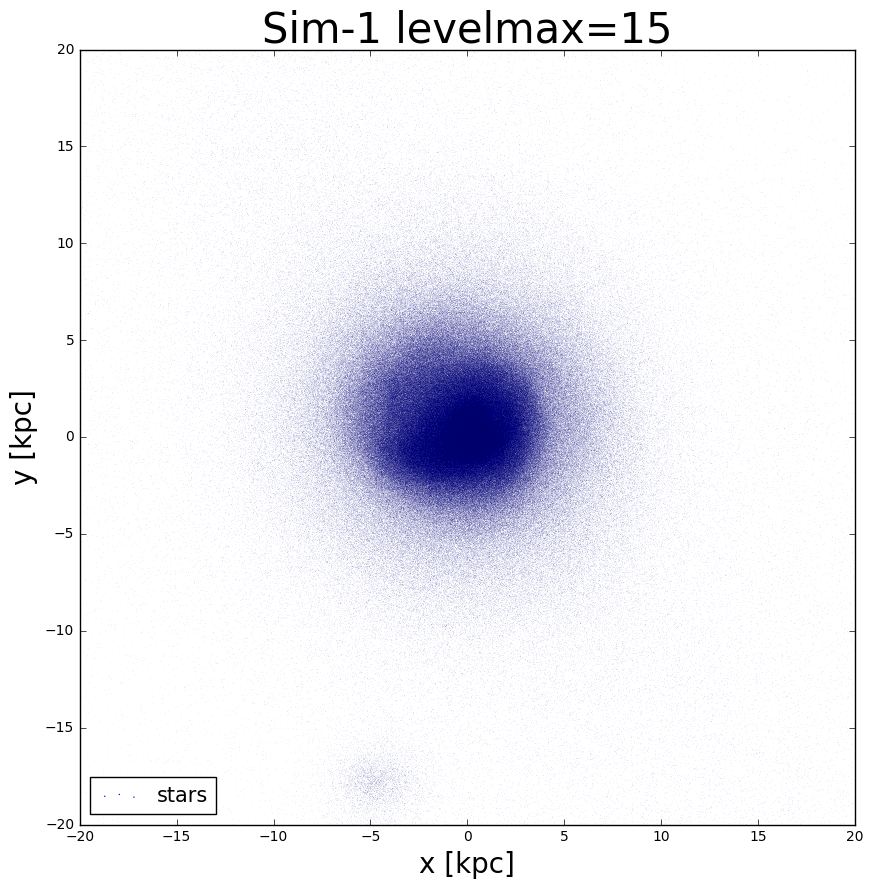

In [17]:
fig,ax = plt.subplots(figsize=[10,10])
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])
#plt.axis('off')
ax.set_title("Sim-1 levelmax=15",fontsize=30)
ax.set_xlabel("x [kpc]" , fontsize=20)
ax.set_ylabel("y [kpc]" , fontsize=20)

ax.scatter(-myhalo.st.pos3d[:,0],-myhalo.st.pos3d[:,1], s=0.09, lw=0,alpha=0.2)
ax.scatter(30,30,c='b',s=1, lw=0,label = "stars")
#for i in range(0,len(xdm)):
#    ax.arrow(xdm[i], ydm[i], vxdm[i], vydm[i], head_width=0.1, head_length=.19, fc='k', ec='k')
legend = ax.legend(loc='lower left', ncol=1, shadow=False, fontsize=15)

In [18]:
edges = np.linspace(-20,20,50)
H, xedges, yedges = np.histogram2d(-myhalo.gs.pos3d[:,0], -myhalo.gs.pos3d[:,1], bins=(edges, edges),weights=myhalo.gs.vel3d[:,0])
H_vx = H.T
H, xedges, yedges = np.histogram2d(-myhalo.gs.pos3d[:,0], -myhalo.gs.pos3d[:,1], bins=(edges, edges),weights=myhalo.gs.vel3d[:,1])
H_vy = H.T
H, xedges, zedges = np.histogram2d(-myhalo.gs.pos3d[:,0], -myhalo.gs.pos3d[:,1], bins=(edges, edges),weights=myhalo.gs.vel3d[:,2])
H_vz = H.T
H, xedges, yedges = np.histogram2d(-myhalo.gs.pos3d[:,0], -myhalo.gs.pos3d[:,1], bins=(edges, edges),weights=myhalo.gs.vr)
H_vr = H.T

196298.441551


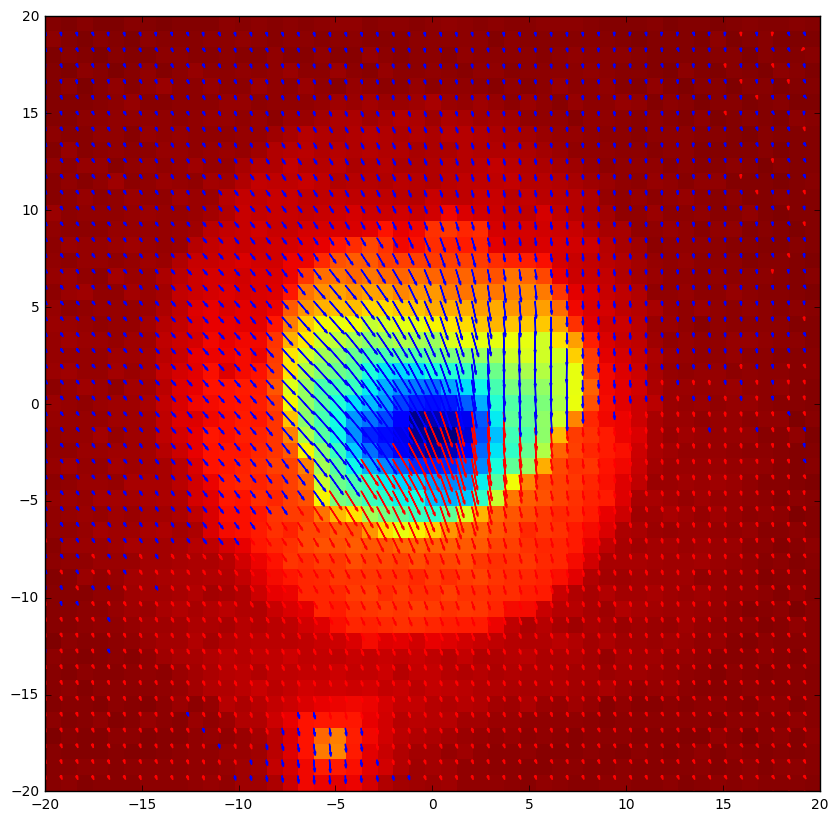

In [20]:
fig,ax = plt.subplots(figsize=[10,10])
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])
#plt.axis('off')
#ax.set_title("Dark matter",fontsize=35)
print H_vx.max()
ax.imshow(H_vz, interpolation='nearest', origin='low',
          extent=[edges[0], edges[-1], edges[0], edges[-1]])
for i in range(len(xedges)-1):
    for j in range(len(yedges)-1):
        if H_vr[j,i]>0:
            ax.arrow(xedges[i], yedges[j], H_vx[j,i]/H_vx.max(), H_vy[j,i]/H_vx.max(),
                     head_width=0.1, head_length=.19, fc='b', ec='b')
        else:
            ax.arrow(xedges[i], yedges[j], H_vx[j,i]/H_vx.max(), H_vy[j,i]/H_vx.max(),
                     head_width=0.1, head_length=.19, fc='r', ec='r')
        


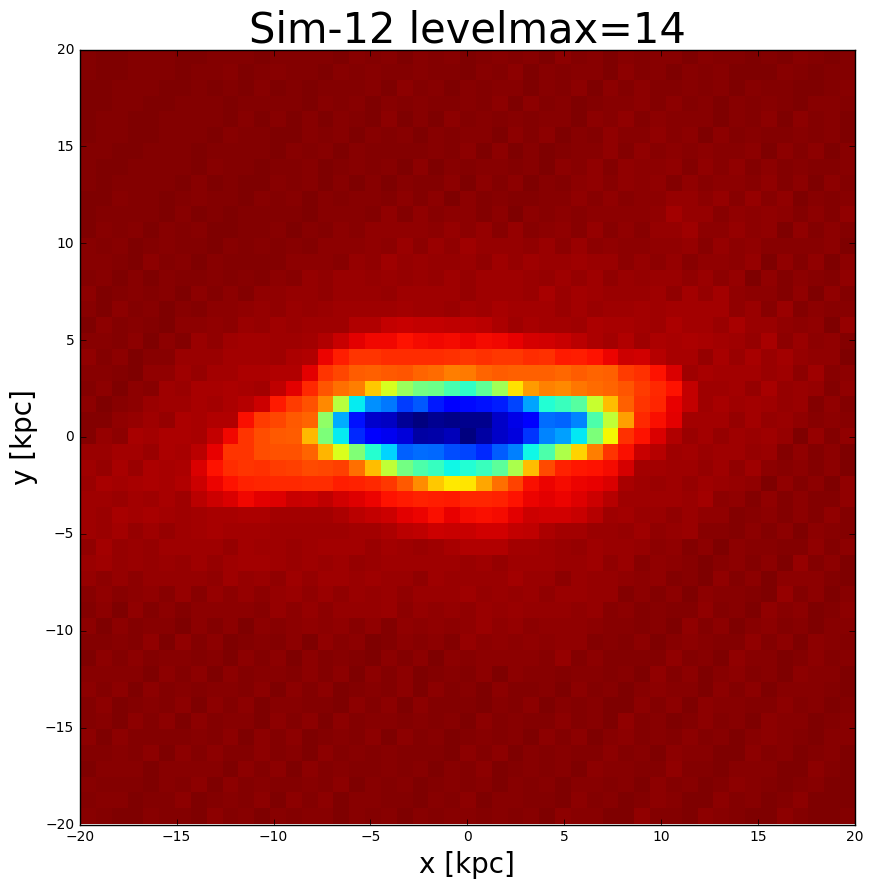

In [14]:
fig,ax = plt.subplots(figsize=[10,10])
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])
#plt.axis('off')
ax.set_title("Sim-12 levelmax=14",fontsize=30)
ax.set_xlabel("x [kpc]" , fontsize=20)
ax.set_ylabel("y [kpc]" , fontsize=20)
ax.imshow(H_vz, interpolation='nearest', origin='low',
          extent=[edges[0], edges[-1], edges[0], edges[-1]])

In [22]:
edges = np.linspace(-20,20,300)
H, xedges, yedges = np.histogram2d(myhalo.st.pos3d[:,0], myhalo.st.pos3d[:,1], bins=(edges, edges),weights=myhalo.st.mass)
mass_faceon = H.T
H, xedges, yedges = np.histogram2d(myhalo.st.pos3d[:,0], myhalo.st.pos3d[:,2], bins=(edges, edges),weights=myhalo.st.mass)
mass_edgeon = H.T

H, xedges, yedges = np.histogram2d(myhalo.st.pos3d[:,0], myhalo.st.pos3d[:,1], bins=(edges, edges),weights=myhalo.st.age)
age_faceon = H.T
H, xedges, yedges = np.histogram2d(myhalo.st.pos3d[:,0], myhalo.st.pos3d[:,2], bins=(edges, edges),weights=myhalo.st.age)
age_edgeon = H.T

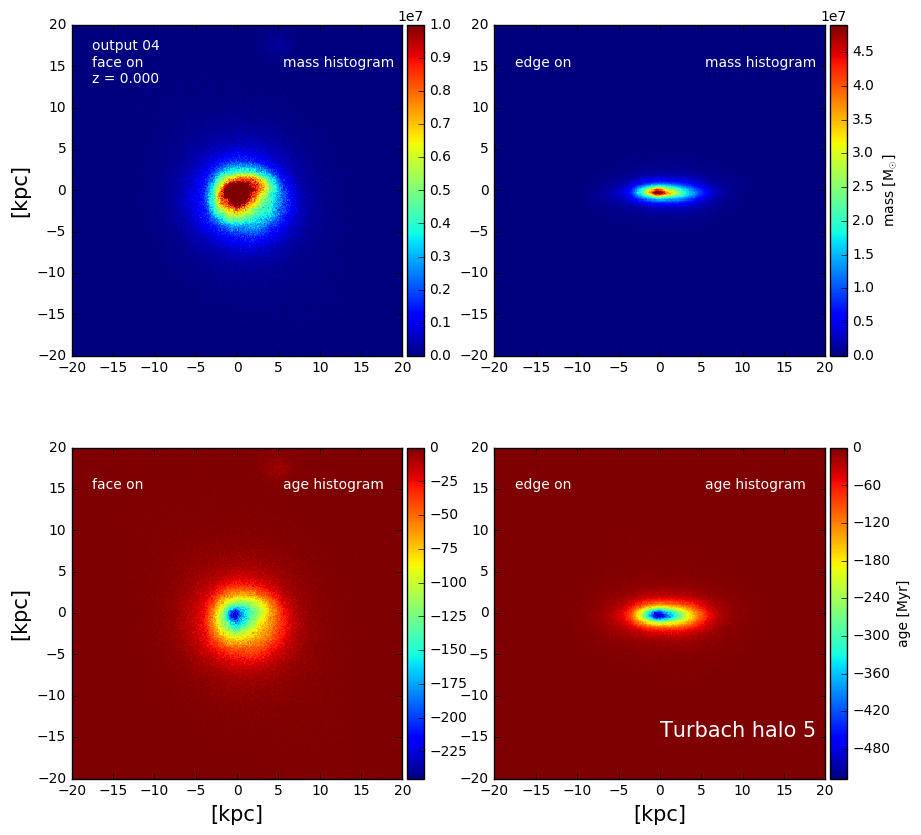

In [25]:
fig,ax = plt.subplots(2,2,figsize=[10,10])
index = np.array([[0,0],[0,1],[1,0],[1,1]])
for i in range(2):
    for j in range(2):
        ax[i,j].set_xlim([-20,20])
        ax[i,j].set_ylim([-20,20])
#plt.axis('off')
ax[1,1].set_xlabel("[kpc]" , fontsize=15)
ax[1,0].set_xlabel("[kpc]" , fontsize=15)
ax[1,0].set_ylabel("[kpc]" , fontsize=15)
ax[0,0].set_ylabel("[kpc]" , fontsize=15)

mass_1 = ax[0,0].imshow(mass_faceon, interpolation='nearest', origin='low',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],vmax=1e7)
mass_2 = ax[0,1].imshow(mass_edgeon, interpolation='nearest', origin='low',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]],vmax=4.9e7)

age_1 = ax[1,0].imshow(age_faceon, interpolation='nearest', origin='low',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]])
age_2 = ax[1,1].imshow(age_edgeon, interpolation='nearest', origin='low',
                       extent=[edges[0], edges[-1], edges[0], edges[-1]])


ax[0,0].text(-17.5,17,"output {0}".format(path[-3:-1]),color='w')
ax[0,0].text(-17.5,15,"face on",color='w')
ax[0,0].text(5.5,15,"mass histogram",color='w')
ax[0,1].text(5.5,15,"mass histogram",color='w')
ax[1,0].text(-17.5,15,"face on",color='w')
ax[0,1].text(-17.5,15,"edge on",color='w')
ax[1,1].text(-17.5,15,"edge on",color='w')
ax[1,0].text(5.5,15,"age histogram",color='w')
ax[1,1].text(5.5,15,"age histogram",color='w')
ax[1,1].text(0,-15,"Turbach halo 5",color='w',fontsize=15)

ax[0,0].text(-17.5,13,"z = {0:0.3f}".format(abs((1./myhalo.p.aexp)-1) ),color='w')

divider = make_axes_locatable(ax[0,0])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_1,cax=cax)

divider = make_axes_locatable(ax[0,1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_2,cax=cax,label=r'mass [M$_{\odot}$]')

divider = make_axes_locatable(ax[1,0])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(age_1,cax=cax)

divider = make_axes_locatable(ax[1,1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(age_2,cax=cax,label=r'age [Myr]')

GAS

In [21]:
print len(myhalo.gs.pos3d[:,0]),len(myhalo.gs.hsml)

1392594 1392594


In [22]:
randx = np.random.rand(len(myhalo.gs.hsml))*myhalo.gs.hsml
randy = np.random.rand(len(myhalo.gs.hsml))*myhalo.gs.hsml
randz = np.random.rand(len(myhalo.gs.hsml))*myhalo.gs.hsml
pos_gasx = myhalo.gs.pos3d[:,0]+randx
pos_gasy = myhalo.gs.pos3d[:,1]+randy
pos_gasz = myhalo.gs.pos3d[:,2]+randz

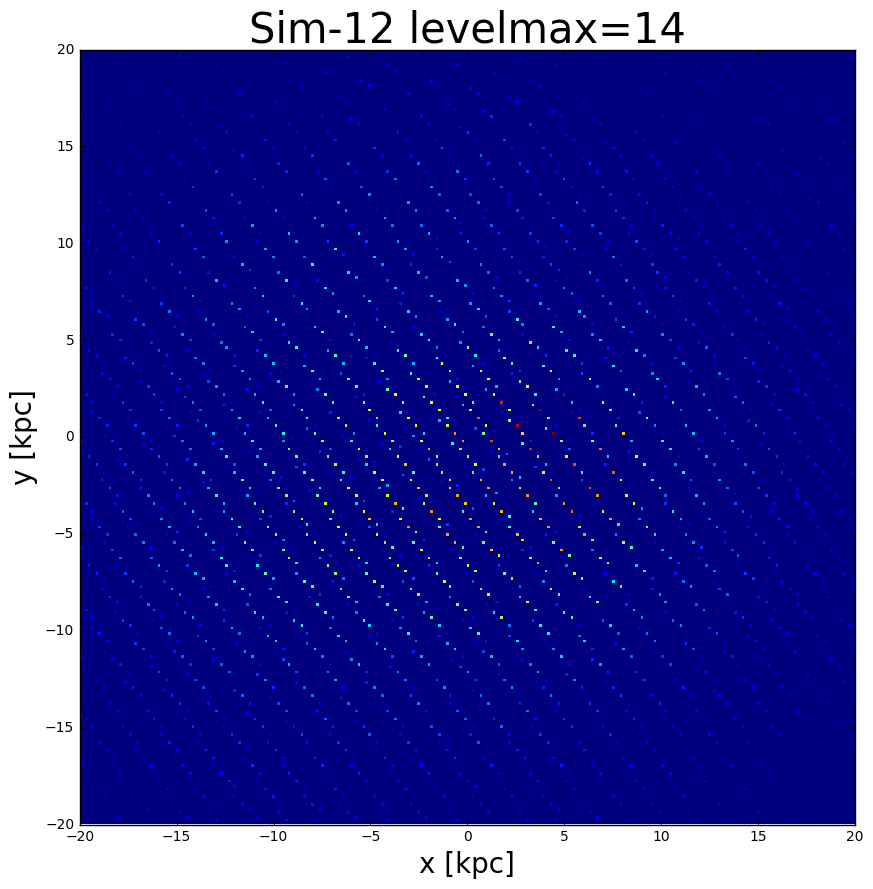

In [23]:
edges = np.linspace(-20,20,300)
H, xedges, yedges = np.histogram2d(-pos_gasx, -pos_gasy, bins=(edges, edges),weights=myhalo.gs.mass)
H = H.T
fig,ax = plt.subplots(figsize=[10,10])
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])
#plt.axis('off')
ax.set_title("Sim-12 levelmax=14",fontsize=30)
ax.set_xlabel("x [kpc]" , fontsize=20)
ax.set_ylabel("y [kpc]" , fontsize=20)
ax.imshow(H, interpolation='nearest', origin='low',
          extent=[edges[0], edges[-1], edges[0], edges[-1]])